# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import logging
from pathlib import Path

from PIL import Image
from google import genai

import tt

LOG = logging.getLogger(__name__)
tt.logging_init()

In [ ]:
CLASSES = [
    "chicken",
    "cow",
    "creeper",
    "enderman",
    "pig",
    "player",
    "sheep",
    "skeleton",
    "spider",
    "villager",
    "zombie",
]
CLASSES.sort()
CLASSES_MINECRAFT = [f"minecraft {x}" for x in CLASSES]

flash = "gemini-2.5-flash"
flash_lite = "gemini-2.5-flash-lite"
prompt_short = f"""Detect {", ".join(CLASSES)}."""

mobs_path = Path.home() / "src/data/mobs1/640"

# File upload

In [5]:
gf = tt.GeminiFile()
# gf.upload_dir(mobs_path)
gf.sync()
print(gf.gfiles)

[13:01:10]:[INFO]:(httpx): HTTP Request: GET https://generativelanguage.googleapis.com/v1beta/files "HTTP/1.1 200 OK"
[13:01:11]:[INFO]:(httpx): HTTP Request: GET https://generativelanguage.googleapis.com/v1beta/files?pageToken=ciEKD4IBDAix55_IBhCwwZ2OAwoOQgxnc3ljeDY0dDloZGE "HTTP/1.1 200 OK"
[13:01:11]:[INFO]:(httpx): HTTP Request: GET https://generativelanguage.googleapis.com/v1beta/files?pageToken=ciAKDoIBCwie55_IBhCoi_B6Cg5CDHlrM2FwY3Q1eG56eg "HTTP/1.1 200 OK"
[13:01:11]:[INFO]:(httpx): HTTP Request: GET https://generativelanguage.googleapis.com/v1beta/files?pageToken=ciEKD4IBDAiN55_IBhCQtbbJAwoOQgw4b3ZzaTIxdzN6a2E "HTTP/1.1 200 OK"
[13:01:11]:[INFO]:(httpx): HTTP Request: GET https://generativelanguage.googleapis.com/v1beta/files?pageToken=ciAKDoIBCwj85p_IBhCghuJtCg5CDDFneG4zZjExdTg0Zw "HTTP/1.1 200 OK"
[13:01:11]:[INFO]:(httpx): HTTP Request: GET https://generativelanguage.googleapis.com/v1beta/files "HTTP/1.1 200 OK"
[13:01:11]:[INFO]:(httpx): HTTP Request: GET https://generativ

[File(
  create_time=datetime.datetime(2025, 11, 3, 0, 13, 53, 531139, tzinfo=TzInfo(0)),
  display_name='/Users/joe/src/data/mobs1/640/ff14c8a4-2024-10-20_22.23.01.png',
  expiration_time=datetime.datetime(2025, 11, 5, 0, 13, 53, 210265, tzinfo=TzInfo(0)),
  mime_type='image/png',
  name='files/u2r50st3vorl',
  sha256_hash='NjEyMmFkN2ExZjk3NTUwZWRkMzczZjcxN2ZiYzkyMTBjMjJiMjhhODRkNmE0MjEzYTE4NzVjYTQxNzJiZmI3ZA==',
  size_bytes=467090,
  source=<FileSource.UPLOADED: 'UPLOADED'>,
  state=<FileState.ACTIVE: 'ACTIVE'>,
  update_time=datetime.datetime(2025, 11, 3, 0, 13, 53, 531139, tzinfo=TzInfo(0)),
  uri='https://generativelanguage.googleapis.com/v1beta/files/u2r50st3vorl'
), File(
  create_time=datetime.datetime(2025, 11, 3, 0, 13, 51, 937627, tzinfo=TzInfo(0)),
  display_name='/Users/joe/src/data/mobs1/640/f21b358a-2024-10-20_22.22.12.png',
  expiration_time=datetime.datetime(2025, 11, 5, 0, 13, 51, 654292, tzinfo=TzInfo(0)),
  mime_type='image/png',
  name='files/leiqy8dzrqgu',
  sha2

# 

# Detect

[14:54:35]:[INFO]:(google_genai.models): AFC is enabled with max remote calls: 10.
[14:54:38]:[INFO]:(httpx): HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"


[{'xyxyn': (0.422, 0.58, 0.519, 0.754), 'label': 'cow'}, {'xyxyn': (0.674, 0.539, 0.733, 0.632), 'label': 'cow'}, {'xyxyn': (0.563, 0.473, 0.616, 0.527), 'label': 'sheep'}, {'xyxyn': (0.724, 0.569, 0.915, 0.77), 'label': 'cow'}]


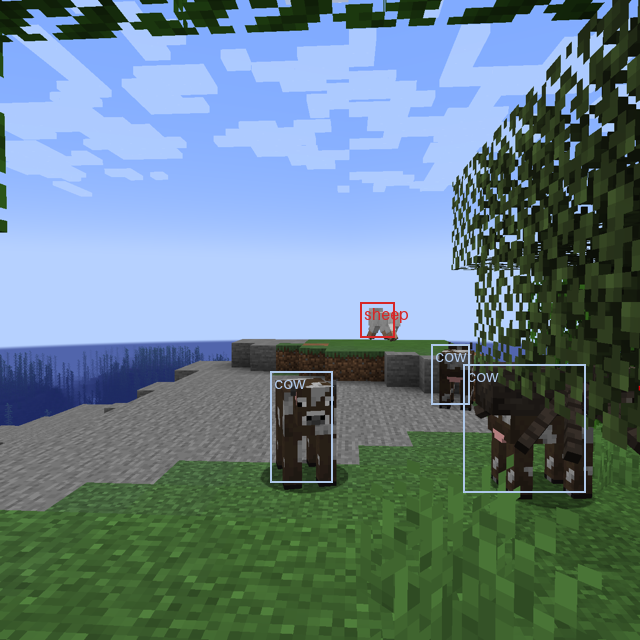

In [33]:
# image640 = Image.open(mobs_path / "06092b21-2024-10-20_22.22.09.png")
image640 = Image.open(sorted(mobs_path.glob("*.png"))[5])
# display(image640)
bbox = tt.gemini_detect(image640, prompt_short, model=flash)
print(bbox)
display(tt.plot_bb(image640, bbox, CLASSES))

In [ ]:
def detect_gfiles(gf: genai.types.File) -> tuple[Image.Image, str]:
    assert isinstance(gf.display_name, str)
    image_file = gf.display_name
    bbs = tt.gemini_detect(gf, prompt_short)
    ann_image = tt.plot_bb(Image.open(image_file), bbs, CLASSES)
    return ann_image, image_file
    
gf.sync()
tt.InferViewer[genai.types.File](detect_gfiles, gf.gfiles).show_widget()